In [0]:
import keras 
from keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels)

(60000, 28, 28) [5 0 4 ... 5 6 8]


In [5]:
train_images.shape

(60000, 28, 28)

0


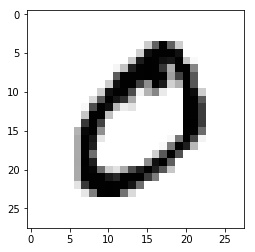

In [8]:
import matplotlib.pyplot as plt
digit = train_images[1]
print(train_labels[1])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
# color든 흑백이든 받기 위해서 ',' 사용
# hidden layer에서는 relu사용

network.add(layers.Dense(10, activation='softmax'))
# 확률 값으로 바꿔주는 것이 softmax, 가장 큰 데이터의 index를 찾기 위해서 argmax사용
# 분류하기 위해서 softmax한다.

W0705 10:22:11.574150 140488613586816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 10:22:11.640088 140488613586816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 10:22:11.655019 140488613586816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
network.compile(optimizer='rmsprop', \
                loss='categorical_crossentropy', metrics=['accuracy'])
# loss='categorical_crossentropy' : 항목간의 비교 == 오차의 총합을 구함

W0705 10:35:52.973207 140488613586816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 10:35:53.021982 140488613586816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# 새로운 data에 대한 평균 데이터를 모르기 때문에 주가(평균 예측 불가능..)에 대해서는 정규화하기 힘들어서
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.
# 한 픽셀의 값의 범위 0 <= val <= 255라서 255로 정규화
# 정규화 안하면, softmax에서 사용하기 힘들어짐

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels) # one hot encoding 해줌
test_labels = to_categorical(test_labels)

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
# 60000장 한 번에 다 학습시킬 수 없어서 128장씩 학습시킴
# batch_size는 크게 잡을수록 좋다. == 한 번에 학습을 많이 시킴
# batch_size가 너무 작으면 local minima에 빠질 가능성이 있다.

W0705 10:46:13.639735 140488613586816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 10:46:13.718438 140488613586816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.2585 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.1037 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0684 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0500 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.0372 - acc: 0.9884


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

10000/10000 [==============================] - 0s 49us/step
test_acc:  0.9804


# [DNN 참고 영상 : 3Blue1brown](https://www.youtube.com/watch?v=aircAruvnKk)

[fc layer의 문제점](https://umbum.tistory.com/223)  
convolution은 이미지의 공간정보를 유지함  따라서 이미지 학습에 유리함

filter를 잘 뽑기 위해서 여러 filter를 사용  
Convolution 레이어의 출력 데이터가 줄어드는 것을 방지하는 방법이 패딩입니다  
(패딩 계속하다가 스칼라가 되면 더이상 convolution 적용 못함)  

필터는 3\*3, pooling은 2\*2가 국룰, pooling은 maxpooling을 주로 쓴다.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))  
# 3 * 3 필터가 32개 : 처음엔 필터에 랜덤한 값이 들어가 있다.
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# 3 * 3 필터가 64개 : 처음엔 필터에 랜덤한 값이 들어가 있다.
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [37]:
model.summary()
# conv2d_2 (Conv2D) (None, 11, 11, 64) : 32장에서 1장 마다 64개의 filter를 거침
# 각 feature map에서 64개의 feature map의 합을 구함

# (None, 5, 5, 64) 11을 maxpooling 거치면서 5.5에서 버림을 함

# 값을 0과 1사이로 만들기 위해서 bias와 weight 사용
# param 수 : 9 * 32(weight의 수) + 32(bias의 수) == 320
# wx + b 값을 구한 다음 activation함수를 적용한다.

# keras에서 stride는 default로 1, padding도 default로 1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                36928     
__________

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) 
# 공간 정보가 중요해서 28, 28, 1로 표기
# fc로 했던것과 달리, 이미지의 공간 정보를 유지하면서 
# 인접 이미지와의 특징을 효과적으로 인식

train_images = train_images.astype('float32') / 255.

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255.

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [41]:
model.compile(optimizer='rmsprop', \
                loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 56s 929us/step - loss: 0.1776 - acc: 0.9442
Epoch 2/5
60000/60000 [==============================] - 55s 924us/step - loss: 0.0479 - acc: 0.9851
Epoch 3/5
60000/60000 [==============================] - 55s 918us/step - loss: 0.0337 - acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 55s 919us/step - loss: 0.0247 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 55s 919us/step - loss: 0.0194 - acc: 0.9943


In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 3s 314us/step
0.03221996752946216 0.9897
